### Esercitazione 11

### Regressione con Reti Neurali

L'obiettivo di questa simulazione è effettuare una regressione su dati rumorosi utilizzando una rete neurale. Si esplora come la capacità di adattamento del modello dipenda dalla struttura della rete e dalla funzione di attivazione impiegata. Lo scopo è anche acquisire intuizioni riguardo alla difficoltà di predizione in presenza di rumore.


## Il Problema di Predizione

I dati osservati $(x, y)$ sono generati da un processo probabilistico secondo la relazione:

$$
y_i = f(x_i) + \eta_i,
$$

dove $f(x_i)$ è una funzione fissa ma potenzialmente sconosciuta, mentre $\eta_i$ rappresenta rumore gaussiano non correlato con media zero e varianza $\sigma$:

$$
\langle \eta_i \rangle = 0, \quad \langle \eta_i \eta_j \rangle = \delta_{ij} \sigma.
$$

La funzione $f(x_i)$ è definita come la **funzione vera** usata per generare i dati, mentre la rete neurale approssima una funzione appartenente alla **classe di modelli** definita dalla sua architettura e parametri.

### Struttura:

- Sono stati generati dati per la regressione considerando due diverse funzioni di riferimento:
  - Lineare: $ f(x) = 2x + 1 $
  - Polinomiale: $ f(x) = 4 - 3x - 2x^2 + 3x^3 $

- Il dataset totale comprende 2000 punti, suddivisi in 80% per il training e 20% per il test. Per ogni punto, il valore $y$ è calcolato aggiungendo rumore gaussiano con deviazione standard 0.2.

- La rete neurale utilizzata è un modello sequenziale con:
  - 3 layer nascosti da 20 neuroni ciascuno
  - funzioni di attivazione variabili ReLU, Tanh, Sigmoid, SELU, ELU
  - un neurone in output per la regressione.

- L'ottimizzazione è svolta tramite discesa del gradiente stocastica (SGD) minimizzando la Mean Squared Error (MSE).

- L’addestramento è eseguito per 30 epoche con batch size 32, utilizzando una suddivisione interna del training set per la validazione (20%).

### Valutazione e Visualizzazione

- Per ogni funzione di attivazione è stato tracciato l’andamento della loss (MSE) sia sul training set sia sul validation set nel corso delle epoche, per valutare la convergenza e la capacità di generalizzazione.

- Sono state effettuate predizioni su nuovi dati generati casualmente nell’intervallo di addestramento $[-1,1]$ e su dati “anormali”, cioè con valori di input fuori dal range di training, per osservare la robustezza del modello.

- Sono stati prodotti grafici che mostrano:
  - La funzione vera $f(x)$,
  - Le predizioni del modello nel range di training,
  - Le predizioni su dati anomali fuori dal range di training.





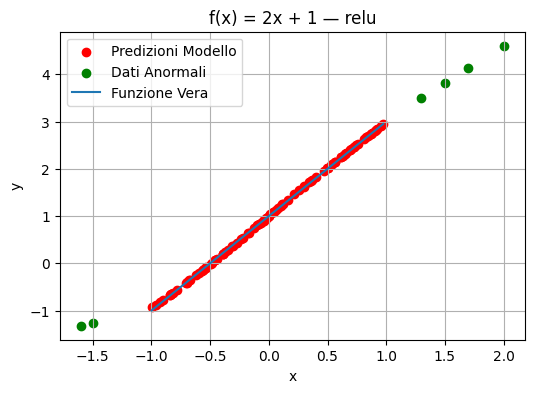

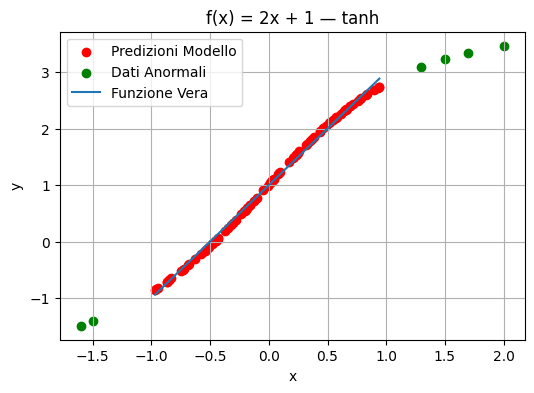

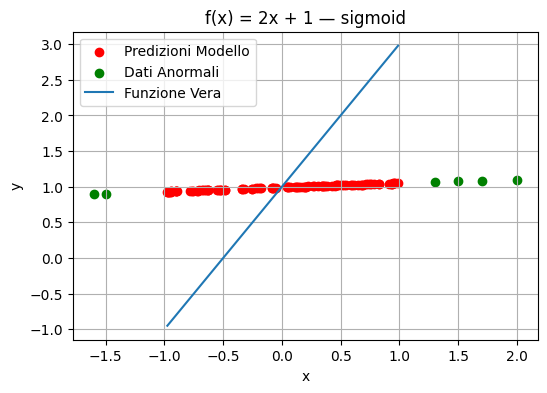

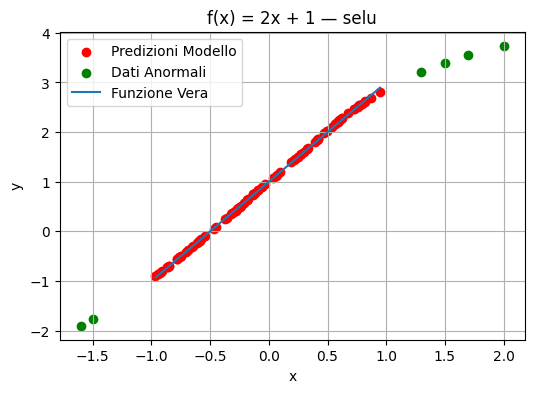

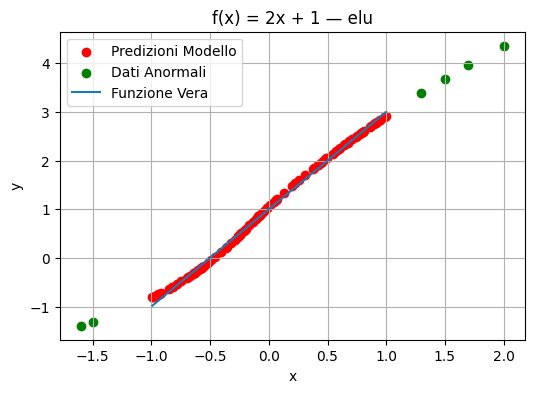

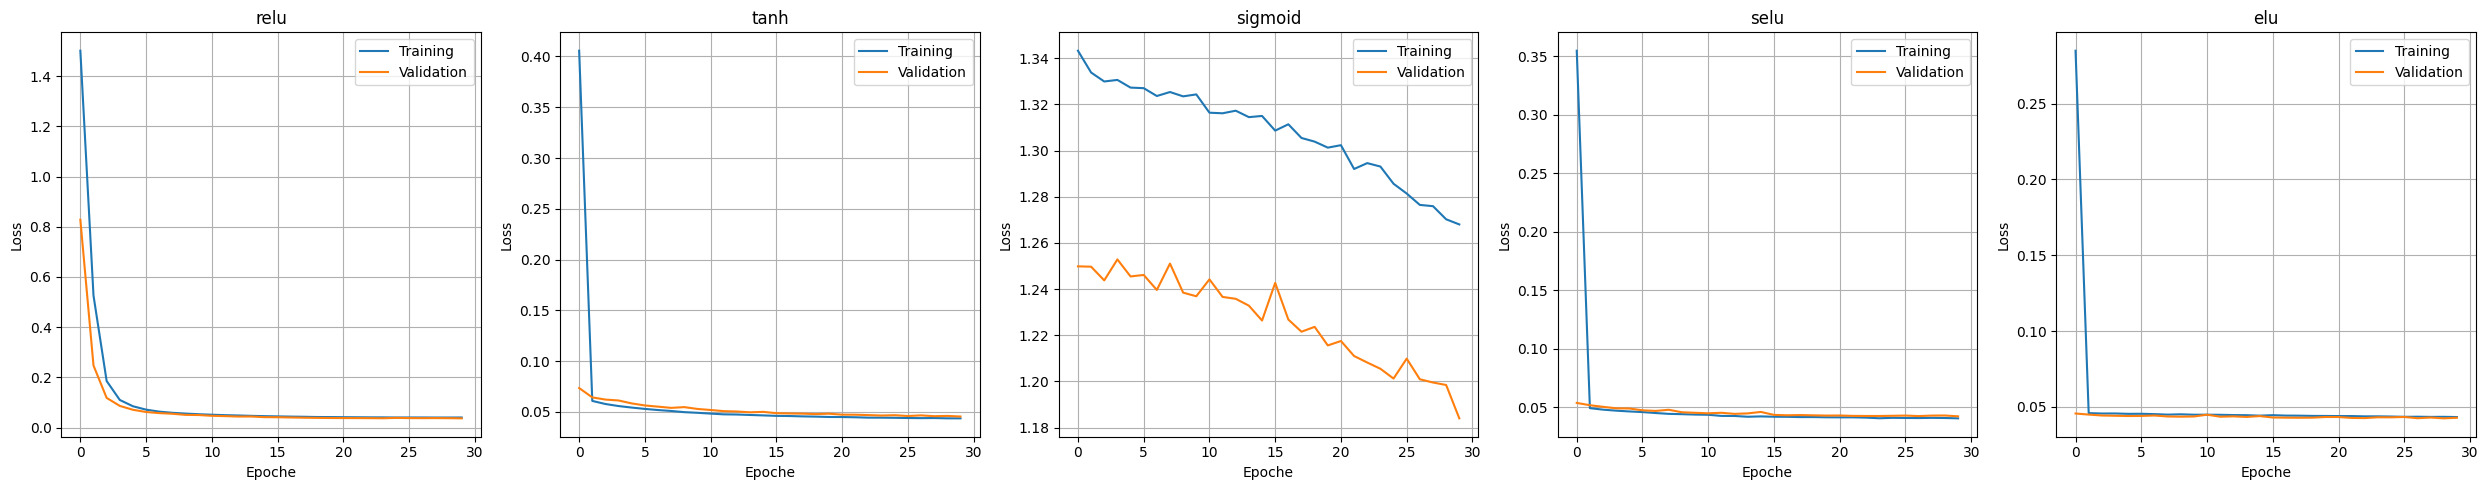

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display

i = 0

def f(x, i):
    if i == 0:
        return 2 * x + 1
    else:
        return 4 - 3 * x - 2 * x * x + 3 * x * x * x

N_dat = 2000
N_epoche = 30
activations = ['relu', 'tanh', 'sigmoid', 'selu', 'elu']

# Figura per confronto delle loss (da NON chiudere)
fig_loss, axes = plt.subplots(1, len(activations), figsize=(5 * len(activations), 5))
axes = axes.flatten()

for j, activation in enumerate(activations):
    x_train, y_train, x_test, y_test = [], [], [], []

    model = Sequential([
        Dense(20, activation=activation, input_shape=(1,)),
        Dense(20, activation=activation),
        Dense(20, activation=activation),
        Dense(1)
    ])

    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    for el in range(N_dat):
        x = np.random.uniform(-1, 1)
        n = np.random.normal(0., 0.2)
        y = f(x, i) + n
        if el < 0.8 * N_dat:
            x_train.append(x)
            y_train.append(y)
        else:
            x_test.append(x)
            y_test.append(y)

    x_train = np.array(x_train).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)

    history = model.fit(
        x_train, y_train,
        epochs=N_epoche,
        batch_size=32,
        validation_split=0.2,
        shuffle=True,
        verbose=0
    )

    score = model.evaluate(x_test, y_test, batch_size=32, verbose=0)

    # → subplot nella figura generale (NON chiuderla!)
    axes[j].plot(history.history['loss'], label='Training')
    axes[j].plot(history.history['val_loss'], label='Validation')
    axes[j].set_title(f'{activation}')
    axes[j].set_xlabel('Epoche')
    axes[j].set_ylabel('Loss')
    axes[j].legend()
    axes[j].grid(True)

    # → figura singola per predizione
    fig_pred, ax_pred = plt.subplots(figsize=(6, 4))

    x_predicted = np.sort(np.random.uniform(-1, 1, 100).reshape(-1, 1), axis=0)
    y_predicted = model.predict(x_predicted, verbose=0)

    x_anormal = np.sort(np.array([1.5, 2, -1.5, 1.3, 1.7, -1.6]).reshape(-1, 1), axis=0)
    y_anormal = model.predict(x_anormal, verbose=0)

    if i == 0:
        ax_pred.set_title(f"f(x) = 2x + 1 — {activation}")
    else:
        ax_pred.set_title(f"f(x) = 4 - 3x - 2x² + 3x³ — {activation}")

    ax_pred.scatter(x_predicted, y_predicted, color='r', label='Predizioni Modello')
    ax_pred.scatter(x_anormal, y_anormal, color='green', label='Dati Anormali')
    ax_pred.plot(x_predicted, f(x_predicted, i), label='Funzione Vera')
    ax_pred.set_xlabel('x')
    ax_pred.set_ylabel('y')
    ax_pred.legend()
    ax_pred.grid(True)

    display(fig_pred)
    plt.close(fig_pred)  # ← chiude SOLO la figura delle predizioni

# Infine mostra la figura delle loss
fig_loss.tight_layout()
plt.show()  # ← questa ora funziona correttamente in Jupyter


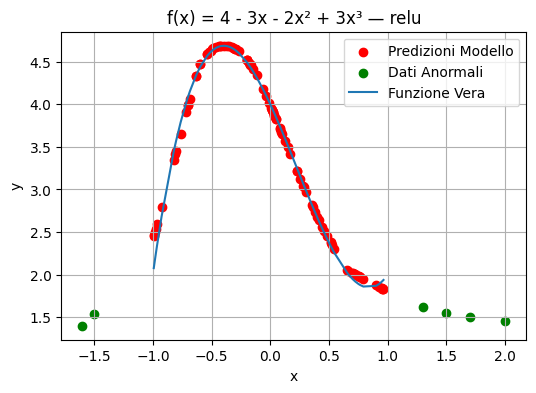

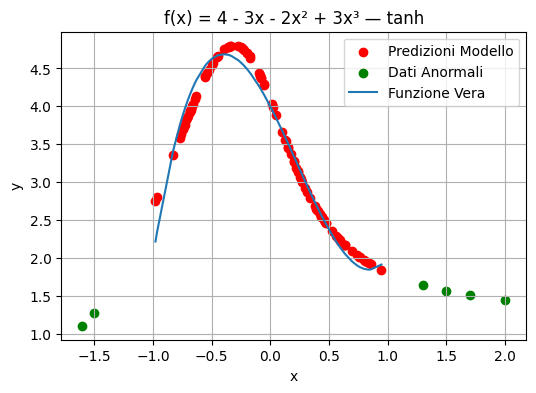

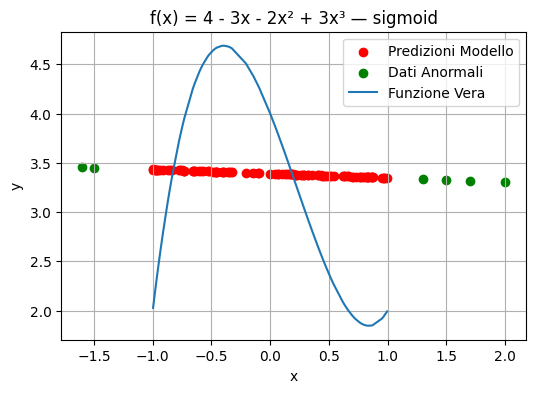

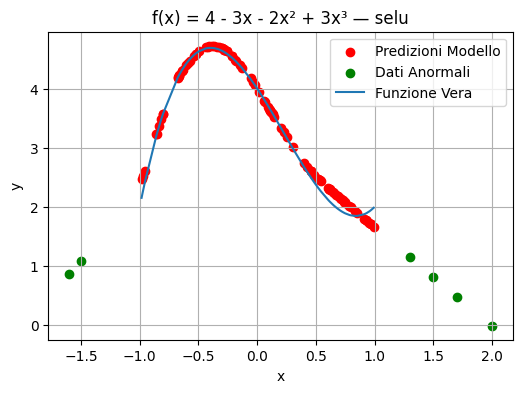

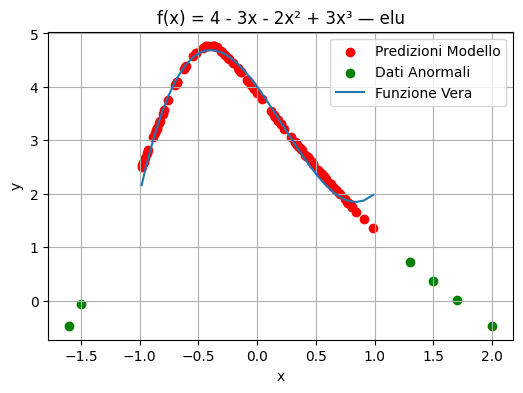

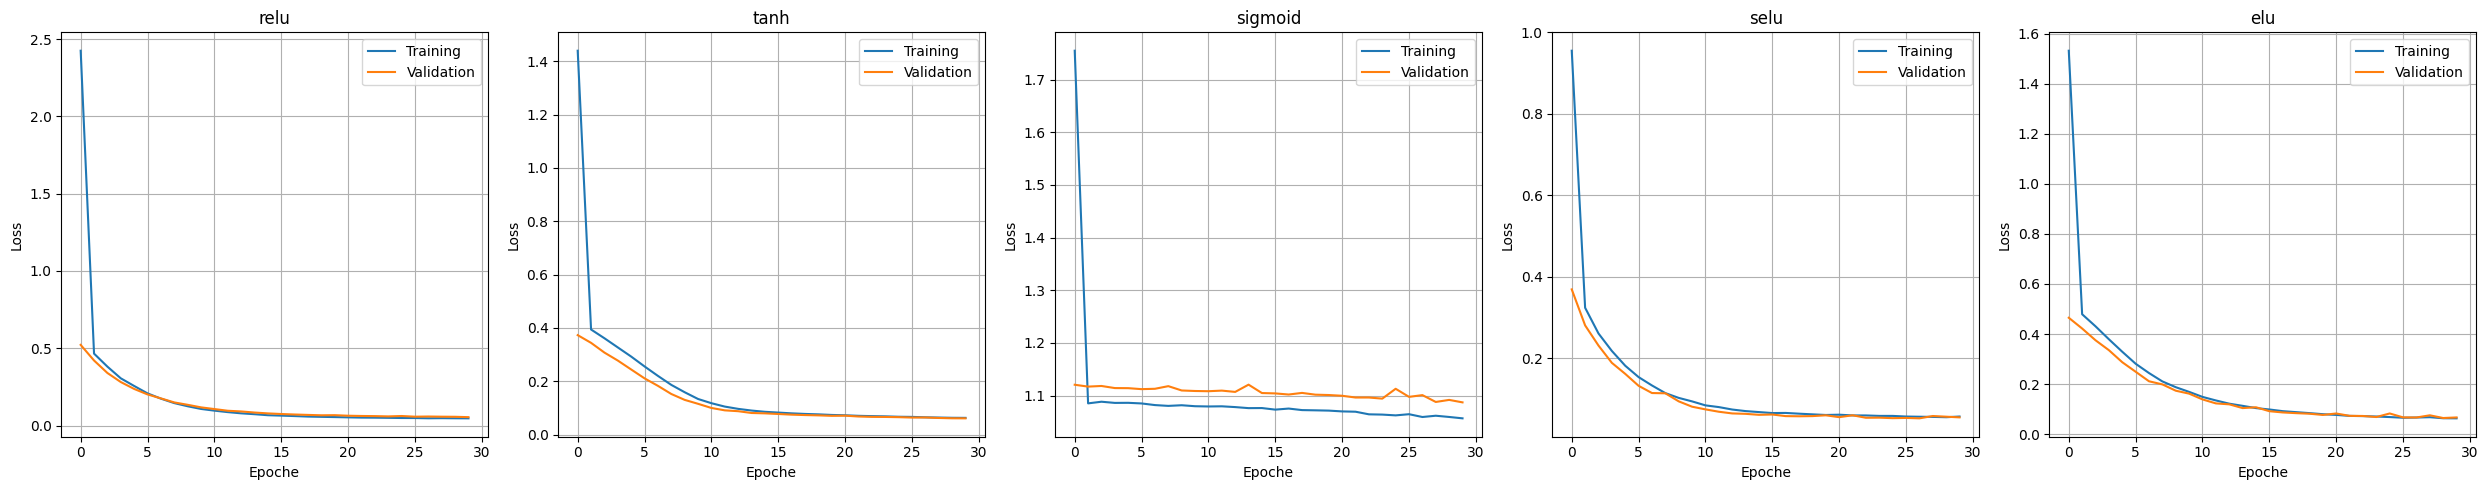

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display

i = 1

def f(x, i):
    if i == 0:
        return 2 * x + 1
    else:
        return 4 - 3 * x - 2 * x * x + 3 * x * x * x

N_dat = 2000
N_epoche = 30
activations = ['relu', 'tanh', 'sigmoid', 'selu', 'elu']

# Figura per confronto delle loss (da NON chiudere)
fig_loss, axes = plt.subplots(1, len(activations), figsize=(5 * len(activations), 5))
axes = axes.flatten()

for j, activation in enumerate(activations):
    x_train, y_train, x_test, y_test = [], [], [], []

    model = Sequential([
        Dense(20, activation=activation, input_shape=(1,)),
        Dense(20, activation=activation),
        Dense(20, activation=activation),
        Dense(1)
    ])

    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    for el in range(N_dat):
        x = np.random.uniform(-1, 1)
        n = np.random.normal(0., 0.2)
        y = f(x, i) + n
        if el < 0.8 * N_dat:
            x_train.append(x)
            y_train.append(y)
        else:
            x_test.append(x)
            y_test.append(y)

    x_train = np.array(x_train).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    x_test = np.array(x_test).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)

    history = model.fit(
        x_train, y_train,
        epochs=N_epoche,
        batch_size=32,
        validation_split=0.2,
        shuffle=True,
        verbose=0
    )

    score = model.evaluate(x_test, y_test, batch_size=32, verbose=0)

    # → subplot nella figura generale (NON chiuderla!)
    axes[j].plot(history.history['loss'], label='Training')
    axes[j].plot(history.history['val_loss'], label='Validation')
    axes[j].set_title(f'{activation}')
    axes[j].set_xlabel('Epoche')
    axes[j].set_ylabel('Loss')
    axes[j].legend()
    axes[j].grid(True)

    # → figura singola per predizione
    fig_pred, ax_pred = plt.subplots(figsize=(6, 4))

    x_predicted = np.sort(np.random.uniform(-1, 1, 100).reshape(-1, 1), axis=0)
    y_predicted = model.predict(x_predicted, verbose=0)

    x_anormal = np.sort(np.array([1.5, 2, -1.5, 1.3, 1.7, -1.6]).reshape(-1, 1), axis=0)
    y_anormal = model.predict(x_anormal, verbose=0)

    if i == 0:
        ax_pred.set_title(f"f(x) = 2x + 1 — {activation}")
    else:
        ax_pred.set_title(f"f(x) = 4 - 3x - 2x² + 3x³ — {activation}")

    ax_pred.scatter(x_predicted, y_predicted, color='r', label='Predizioni Modello')
    ax_pred.scatter(x_anormal, y_anormal, color='green', label='Dati Anormali')
    ax_pred.plot(x_predicted, f(x_predicted, i), label='Funzione Vera')
    ax_pred.set_xlabel('x')
    ax_pred.set_ylabel('y')
    ax_pred.legend()
    ax_pred.grid(True)

    display(fig_pred)
    plt.close(fig_pred)  # ← chiude SOLO la figura delle predizioni

# Infine mostra la figura delle loss
fig_loss.tight_layout()
plt.show()  # ← questa ora funziona correttamente in Jupyter


### Approssimazione di una funzione bidimensionale

Proviamo ora ad estendere il nostro modello per approssimare una funzione 2D non lineare:

$f(x, y) = \sin(x^2 + y^2)$

all'interno del dominio:

$x \in \left[-\frac{3}{2}, \frac{3}{2}\right], \quad y \in \left[-\frac{3}{2}, \frac{3}{2}\right]$


Epoch 1/50
40/40 [==============================] - 0s 6ms/step - loss: 0.3488 - mse: 0.3488 - val_loss: 0.2259 - val_mse: 0.2259
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2168 - mse: 0.2168 - val_loss: 0.1960 - val_mse: 0.1960
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2071 - mse: 0.2071 - val_loss: 0.1927 - val_mse: 0.1927
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2051 - mse: 0.2051 - val_loss: 0.1912 - val_mse: 0.1912
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2038 - mse: 0.2038 - val_loss: 0.1899 - val_mse: 0.1899
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2025 - mse: 0.2025 - val_loss: 0.1890 - val_mse: 0.1890
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2020 - mse: 0.2020 - val_loss: 0.1883 - val_mse: 0.1883
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.2013 - mse: 0.20

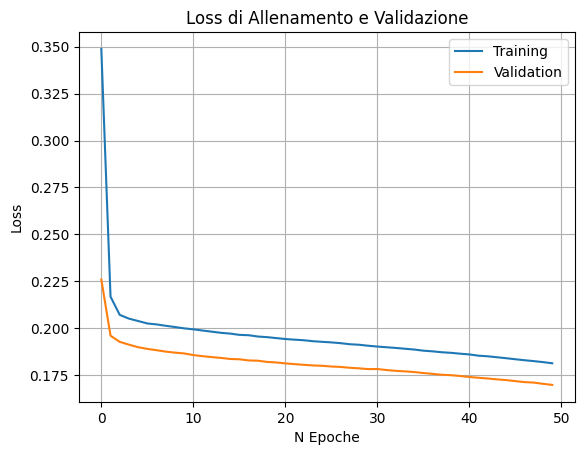

1/1 [==============================] - 0s 19ms/step


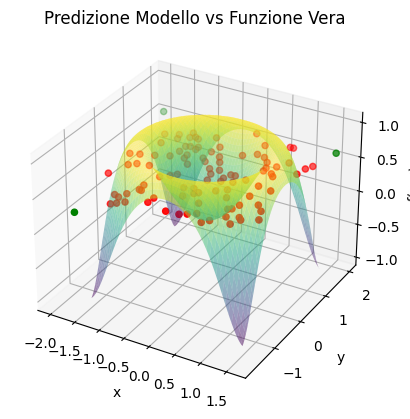

In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Riduci i messaggi di log
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D



def f(x,y):                                                      #Funzione da Approssimare
    return np.sin(x*x+y*y)

N_dat=2000                                                     #Numero di dati per Train e Validation

model = Sequential([                                           #Creo una rete neurale formata da 1 neurone in input 
    Dense(20, activation='relu', input_shape=(2,)),            #3 hidden layer da 20 neuroni neuroni e uno finale in output
    Dense(20,activation="relu"),
    Dense(20,activation="relu"),
    Dense(1)                                                   
])

model.compile(optimizer='sgd',loss='mse',metrics=['mse'])     #Setta le configurazioni del modello, algoritmo adam
                                                               #con Loss e Metrica MeanSquareError

x_train=[]    
y_train=[]
x_test=[]
y_test=[]

for el in range(0,N_dat):                                      #Genero i dati per il Training tra (-3/2,3/2)
    if el<0.8*N_dat:                                           #Suddivido N_dat in 80% train e 20% validation
        x1=np.random.uniform(-3/2,3/2)
        x2=np.random.uniform(-3/2,3/2) 
        n=np.random.normal(0.,0.2,size=None)
        y=f(x1,x2)+n
        x_train.append([x1,x2])
        y_train.append(y)
    else:
        x1=np.random.uniform(-3/2,3/2)
        x2=np.random.uniform(-3/2,3/2) 
        n=np.random.normal(0.,0.2,size=None)
        y=f(x1,x2)+n
        x_test.append([x1,x2])
        y_test.append(y)

x_train=np.array(x_train)                                      #Trasformo le liste in Array se no model.fit non funziona
y_train=np.array(y_train).reshape(-1,1)                        
x_test=np.array(x_test)
y_test=np.array(y_test).reshape(-1,1)

history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,shuffle=True)

                                                               #Allena il modello con i dati di train, usando 30
                                                               #epoche,suddivide N_dat in 32 gruppi,val_split
                                                               #serve a dire la % di N_dat usata per la validation,
                                                               #shuffle per riordinare i batches dopo ogni epoca

model.get_weights()                                            #Calcolo i pesi w e i bias b del modello

score=model.evaluate(x_test,y_test,batch_size=32,verbose=1)    #Performo il modello con i dati di test,verbose=1 è
                                                               #solo per ottenere i dettagli nel terminal durante
                                                               #il processo 


plt.plot(history.history['loss'], label='Training')            #Loss durante il training


plt.plot(history.history['val_loss'], label='Validation')      #Loss durante la validazione

plt.xlabel('N Epoche')
plt.ylabel('Loss')
plt.title('Loss di Allenamento e Validazione')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("LossSin.png")
plt.close()

x_lin = np.linspace(-1.5, 1.5, 100)
y_lin = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_lin, y_lin)
Z = f(X, Y)

                                                                
x_predicted = np.random.uniform(-1.5, 1.5, size=(100, 2))       # Predizione modello
x_predicted_sorted = x_predicted[np.lexsort((x_predicted[:, 1], x_predicted[:, 0]))]
y_predicted = model.predict(x_predicted_sorted)


x_anormal = np.array([[-2, 2], [-1.6, -1.8], [1.6, 1.8]])       # Dati anomali
y_anormal = model.predict(x_anormal)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, edgecolor='none', label='Superficie Vera')  # f(x,y)
ax.scatter(x_predicted_sorted[:, 0], x_predicted_sorted[:, 1], y_predicted.flatten(), c='r', label="Modello")
ax.scatter(x_anormal[:, 0], x_anormal[:, 1], y_anormal.flatten(), c="green", label="Valori Anomali")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title("Predizione Modello vs Funzione Vera")
plt.show()


### Risultati

- La scelta della funzione di attivazione influenza significativamente l’andamento della loss e la capacità di adattamento del modello.

- In generale, funzioni come ReLU e Tanh mostrano una buona convergenza e capacità di modellare la funzione vera anche in presenza di rumore, altre come il Sigmoide non sono adatte per problemi di regressione.

- Le predizioni su dati anomali evidenziano i limiti di generalizzazione delle reti addestrate solo su un intervallo ristretto.

- La rete riesce ad apprendere efficacemente sia la funzione lineare semplice sia quella polinomiale più complessa, sia la funzione sinusoidale, dimostrando la flessibilità delle reti neurali nel modellare funzioni non lineari.
